# Data Visualization

This is the data analysis section where I take the .csv just created and create visualisations of the reddit titles from the official [subreddit of the HBO TV show Succession](https://www.reddit.com/r/SuccessionTV/)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
csv = pd.read_csv("results/succession_titles.csv")


Transform data to lowercase for easy comparison

In [8]:
titles = csv.apply(lambda x: x.replace("'",""))
titles = csv.apply(lambda x: x.str.lower())
titles = titles.titles.apply(str)

Function to count appearances of given names/text in a given dataframe

In [9]:
def count_names(df,names):
    name_count = []
    for name in names:
        count = 0
        for index_of_text in df.index:
            if name in df.iloc[index_of_text]:
                count = count + 1
        name_count.append(count)
    return name_count

Insert wanted names as list, transform to lowercase, run the function char_count() and insert results into a new dataframe

In [10]:
succession_names = ["Kendall","Roman","Shiv","Tom","Greg","Logan","Gerri","Willa","Connor","Marcia","Karolina","Rava","Frank","Hugo","Gil","Karl","Jess"]

temp_names = succession_names.copy()
for i in range(len(temp_names)):
    temp_names[i] = temp_names[i].lower()


char_count = count_names(titles,temp_names)

In [11]:
char_frequency = pd.DataFrame(char_count,index=succession_names,columns=["count"])
char_frequency.index.name = "chars"
char_frequency = char_frequency.reset_index()

Sort dataframe based on counts and visualisation ranking the most mentioned characters in reddit post titles from the series Succession

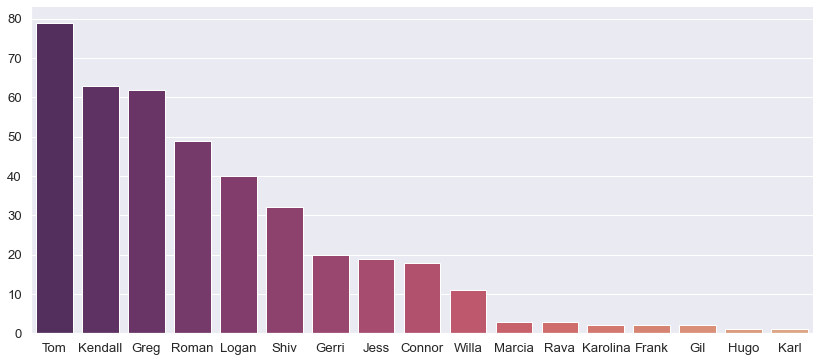

In [12]:
sorted_char_frequency = char_frequency.sort_values("count",ascending=False)

plt.figure(figsize=(14,6))
sns.set_style("white")
sns.set(font_scale=1.20)
bplot = sns.barplot(x=sorted_char_frequency["chars"],y=sorted_char_frequency["count"],palette="flare_r").set(xlabel="",ylabel="")
sns.despine()
plt.savefig("sucession_chars_result.jpg")

Clean data from special characters

In [13]:
titles_clean = titles.apply(lambda title: re.sub(r"[^a-zA-Z0-9]+", ' ', title))

Function for splitting all title words into one list and returns this list

In [27]:
def split_words(df):
    list = [] 
    for words in df:
        for word in words.split():
            list.append(word)
    return list

In [28]:
titles_split = pd.DataFrame(split_words(titles_clean),columns=["word"])
titles_split.head()

,word
0,kendall
1,is
2,out
3,with
4,54


Clean data from stop-words like "is", "with" and numbers (table above)

In [52]:
clean_titles = [word for word in split_words(titles_clean) if word not in stopwords.words('english')]
clean_titles_split = pd.DataFrame(clean_titles,columns=["word"])

Result: The three most mentioned words from reddit post titles are "sucession", "season" and the main character "kendall"

In [54]:
clean_titles_split.value_counts().head(10)

word      
succession    135
season         84
kendall        65
tom            60
anything       51
one            50
greg           49
sell           49
everything     45
episode        44
dtype: int64